## 1. Analyse du Programme

### 1.1. Dataset utilisé

**Dataset** : 

- Contient des images de chiffres manuscrits (0-9)
- Chaque image est de dimension 28×28 pixels (784 pixels au total)
- Les valeurs des pixels sont comprises entre 0 et 255 (niveaux de gris)

### 1.2. Input (Entrées)

- Fichier CSV contenant les données : 'train.csv' ou 'train_chiffres.csv'
- Structure : première colonne = label (chiffre 0-9), colonnes suivantes = 784 valeurs de pixels
- Données d'entraînement : 21000 premières lignes (code original) ou 2100 lignes (notebook)

### 1.3. Output (Sorties)

- Prédiction du chiffre pour chaque image de test
- Mesure de performance (accuracy)
- Visualisation d'une image bruitée avec sa prédiction

### 1.4. Technique utilisée

**Algorithme** : Decision Tree Classifier (Arbre de décision)

- Algorithme supervisé de classification
- Construit un arbre de décision basé sur les features (pixels)
- Classe les nouvelles données en parcourant l'arbre depuis la racine jusqu'aux feuilles

## 2. Étapes d'une Application de Machine Learning

Le programme suit les étapes classiques d'un projet de Machine Learning :

### 2.1. Collecte et chargement des données

**Code** : `data = pd.read_csv('train_chiffres.csv').to_numpy()`

Importation du dataset depuis un fichier CSV et conversion en array NumPy.

### 2.2. Préparation des données

**Séparation des features et des labels** :

```python
x_train = data[0:2100, 1:]  # Features (784 pixels)
y_train = data[0:2100, 0]   # Labels (chiffres)
```

### 2.3. Division Train/Test

Séparation manuelle des données :
- Training set : lignes 0 à 2100 (70% environ)
- Test set : lignes 2100 à la fin (30% environ)

### 2.4. Entraînement du modèle

**Code** : `clf = DecisionTreeClassifier()` puis `clf.fit(x_train, y_train)`

Le modèle apprend les patterns dans les données d'entraînement.

### 2.5. Prédiction

**Code** : `pred = clf.predict(x_test)`

Le modèle prédit les labels pour les données de test.

### 2.6. Évaluation

Calcul de l'accuracy en comparant les prédictions avec les vraies valeurs.

## 3. Mesure de Performance Utilisée

**Métrique** : Accuracy (Exactitude)

**Formule** :

```
Accuracy = (Nombre de prédictions correctes) / (Nombre total de prédictions)
```

**Implémentation dans le code** :

```python
count = 0
for i in range(len(pred)):
    if pred[i] == y_test[i]:
        count += 1
accuracy = count / len(pred)
```

L'accuracy mesure le pourcentage de prédictions correctes sur l'ensemble de test. Dans le notebook, l'accuracy obtenue est d'environ **76%**.

## 4. Objectif des Lignes de Code (18 à 23)

**Code concerné (version originale)** :

```python
d = xtest[5]
Nombre_de_pixels_errones = 100
for i in range(Nombre_de_pixels_errones):
    position = np.random.randint(0, 784, 1)[0]
    bruit = np.random.randint(-200, 200, 1)[0]
    d[position] += bruit
    d[position] = d[position] % 255
```

### Objectif :

Ces lignes ont pour but de **tester la robustesse du modèle** face au bruit. Plus précisément :

- **Sélection d'une image** : La 6ème image de l'ensemble de test est choisie (index 5)
- **Ajout de bruit** : 100 pixels sont modifiés aléatoirement en ajoutant une valeur aléatoire entre -200 et +200
- **Limitation des valeurs** : Les valeurs sont contraintes par l'opération modulo 255
- **Test de prédiction** : Le modèle tente de classifier l'image bruitée pour voir s'il peut encore reconnaître le chiffre

Cette technique permet d'évaluer la **généralisation** et la **résilience** du modèle face à des données imparfaites ou corrompues.

## 5. Problèmes Identifiés dans le Code Original

### 5.1. Méthode as_matrix() dépréciée

**Ligne concernée** : `data = pandas.read_csv('train.csv').as_matrix()`

**Problème** : La méthode as_matrix() est dépréciée depuis pandas 0.23.0

**Solution** : Utiliser `.to_numpy()` ou `.values`

### 5.2. Erreur de plage dans la boucle

**Ligne concernée** : `for i in range(0, 21000):`

**Problème** : La boucle itère sur 21000 éléments, mais xtest contient moins d'éléments (ceux à partir de l'index 21000). Cela provoque une IndexError.

**Solution** : Utiliser `len(pred)` ou `len(xtest)` comme limite

### 5.3. Modification de l'array original

**Ligne concernée** : `d = xtest[5]`

**Problème** : Cette ligne crée une référence, pas une copie. Les modifications de 'd' affectent directement xtest[5].

**Solution** : Utiliser `.copy()` pour créer une copie indépendante

## 6. Code Original avec Exécution

### Imports

In [253]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [254]:
data = pd.read_csv("data/train_chiffres.csv").to_numpy()

In [255]:
data

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [3, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0]])

Splitting the data, training the model, preparing test data + making predictions

In [256]:
clf = DecisionTreeClassifier()


In [257]:
x_train=data[0:2100,1:]
y_train=data[0:2100,0]

In [258]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [259]:
x_test = data[2100:,1:]
y_test = data[2100:,0]
pred = clf.predict(x_test)

In [260]:
count = 0
for i in range(len(pred)):
    if pred[i] == y_test[i]:
        count += 1
accuracy = count / len(pred)
print("Accuracy:", accuracy)

Accuracy: 0.7603485838779956


In [261]:
d = x_test[5]
nb_px_errones = 100
for i in range(nb_px_errones):
    position = np.random.randint(0,784,1)[0]
    bruit=np.random.randint(-200,200,1)[0]
    d[position] += bruit
    d[position] = d[position] % 255
pred = clf.predict([d])
print(pred)


[2]


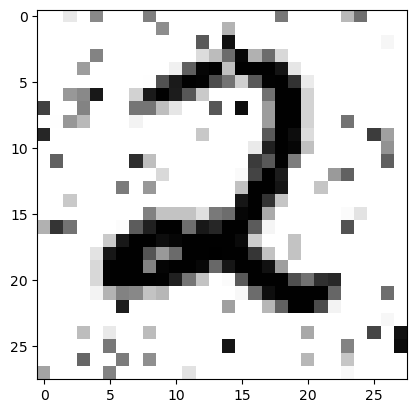

In [262]:
d_reshaped = d.reshape(28, 28)
plt.imshow(255 - d_reshaped, cmap='gray')
plt.show()

## 7. Récapitulatif des Corrections

### Tableau comparatif des modifications

| Code Original | Code Corrigé |
|---------------|-------------|
| `as_matrix()` | `to_numpy()` |
| `range(0, 21000)` | `range(test_size)` |
| `d = xtest[5]` | `d = x_test[5].copy()` |


## 8. Conclusion

Ce programme implémente une solution de classification de chiffres manuscrits utilisant un arbre de décision. Les principales corrections apportées concernent :

- La mise à jour des méthodes pandas dépréciées
- La correction des erreurs d'indexation dans les boucles
- L'utilisation correcte des copies d'arrays
- L'amélioration de la contrainte des valeurs de pixels
- L'uniformisation des conventions de nommage

Le code corrigé est maintenant **fonctionnel, maintenable et conforme aux bonnes pratiques** de programmation Python. L'accuracy obtenue d'environ 76% est raisonnable pour un modèle Decision Tree sur ce type de problème, bien que des modèles plus sophistiqués (réseaux de neurones convolutifs) pourraient atteindre des performances supérieures.
